# Images Folders

In [0]:
# downloading the zip files

# !wget "https://drive.google.com/uc?export=download&id=1fPMgeDlA8dB_GLPPEPeppEQwsAJOuGlD" -O test.zip -q -nc
# !wget "https://drive.google.com/uc?export=download&id=1y-sn3Fgb56fwnbvvp3_OSDrOZaW3VDHA" -O train.zip -q -nc
# !wget "https://drive.google.com//uc?export=download&confirm=ou-b&id=1y-sn3Fgb56fwnbvvp3_OSDrOZaW3VDHA" -O train.zip -q -nc

In [0]:
# remove previous dirs if is the case
!rm -rdf train
!rm -rdf test

In [0]:
# unzipping test images
!unzip -qq test.zip -d test

In [0]:
# unzipping train images
!unzip -qq train.zip

In [0]:
# checking number of files
!ls -1 test | wc -l
!ls -1 train | wc -l

5361
48896


# Images Load

## Modules

In [0]:
import numpy as np
import cv2
import os

## Functions

In [0]:
# loads images from a folder to a numpy ndarray
def load_images_from_folder(target):
    
    images = []
    fnames = []
    
    for fn in os.listdir(target) :
        
        fnames.append(fn)
    
        fp = target + '/{0}'.format(fn)

        img = cv2.imread(fp, 1)

        images.append(img)
        
    images = np.asarray(images)
    
    return images, fnames

In [0]:
# loads images from a folder to a numpy ndarray
def load_images_from_fnlist(fnlist, target):
    
    images = []
    
    for fn in fnlist :
    
        fp = target + '/{0}'.format(fn)

        img = cv2.imread(fp, 1)

        images.append(img)
        
    images = np.asarray(images)
    
    return images

## Tests

### Test folder

In [0]:
test_img, test_fn = load_images_from_folder('test')

In [0]:
type(test_img)

numpy.ndarray

In [0]:
test_img.shape

(5361, 64, 64, 3)

In [0]:
from google.colab.patches import cv2_imshow

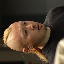

In [0]:
cv2_imshow(test_img[0])

### Train folder

In [0]:
train_img, train_fn = load_images_from_folder('train/')

In [0]:
train_img.shape

(48896, 64, 64, 3)

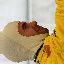

In [0]:
cv2_imshow(train_img[0])

**Note**

Sequence problem!

# Labels Load

In [0]:
import pandas as pd

In [0]:
truths = pd.read_csv('train.truth.csv')

In [0]:
truths.head()

,fn,label
0,0-10049200_1891-09-16_1958.jpg,rotated_left
1,0-10110600_1985-09-17_2012.jpg,rotated_left
2,0-10126400_1964-07-07_2010.jpg,upright
3,0-1013900_1917-10-15_1960.jpg,rotated_right
4,0-10166400_1960-03-12_2008.jpg,upside_down


In [0]:
truths.shape

(48896, 2)

In [0]:
train_fn = truths.fn.tolist()

train_fn[:5]

['0-10049200_1891-09-16_1958.jpg',
 '0-10110600_1985-09-17_2012.jpg',
 '0-10126400_1964-07-07_2010.jpg',
 '0-1013900_1917-10-15_1960.jpg',
 '0-10166400_1960-03-12_2008.jpg']

In [0]:
labels_unique = truths.label.unique().tolist()

labels_unique

['rotated_left', 'upright', 'rotated_right', 'upside_down']

In [0]:
truths['category'] = truths.label.apply( lambda label : labels_unique.index(label) )

In [0]:
truths.head(8)

,fn,label,category
0,0-10049200_1891-09-16_1958.jpg,rotated_left,0
1,0-10110600_1985-09-17_2012.jpg,rotated_left,0
2,0-10126400_1964-07-07_2010.jpg,upright,1
3,0-1013900_1917-10-15_1960.jpg,rotated_right,2
4,0-10166400_1960-03-12_2008.jpg,upside_down,3
5,0-102100_1970-10-09_2008.jpg,rotated_left,0
6,0-1024100_1982-06-07_2011.jpg,rotated_left,0
7,0-10292500_1984-03-26_2009.jpg,rotated_left,0


In [0]:
train_lb = truths.category

In [0]:
train_img = load_images_from_fnlist( train_fn , 'train' )

In [0]:
train_img.shape

(48896, 64, 64, 3)

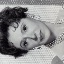

In [0]:
cv2_imshow(train_img[0])